In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab  import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive'

In [ ]:
df=pd.read_csv(path+'/diseases.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dimorphic hemmorhoids(piles)
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Varicose veins
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Osteoarthristis


In [ ]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,0.021967,...,0.021967,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176
std,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,0.146590,...,0.146590,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
df.shape

(4962, 133)

In [ ]:
df.isna().any().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
diseases=list(set(df['prognosis']))
diseases.sort()
print('Number of disease variants:',len(diseases))
print('Disease variants:',diseases)

Number of disease variants: 41
Disease variants: ['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma', 'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis', 'Common Cold', 'Dengue', 'Diabetes ', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis', 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']


In [ ]:
df['prognosis'].value_counts()

Fungal infection                           122
Dimorphic hemmorhoids(piles)               121
Chronic cholestasis                        121
Jaundice                                   121
Peptic ulcer diseae                        121
Bronchial Asthma                           121
Arthritis                                  121
Allergy                                    121
Hepatitis C                                121
Gastroenteritis                            121
hepatitis A                                121
Hepatitis B                                121
GERD                                       121
Hepatitis D                                121
Alcoholic hepatitis                        121
Diabetes                                   121
Typhoid                                    121
Tuberculosis                               121
Hepatitis E                                121
Common Cold                                121
Dengue                                     121
Urinary tract

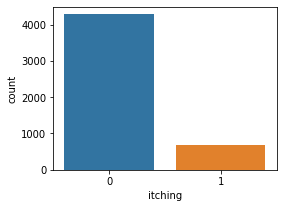

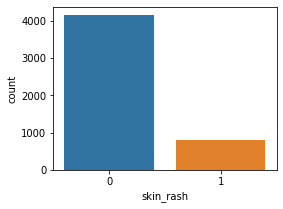

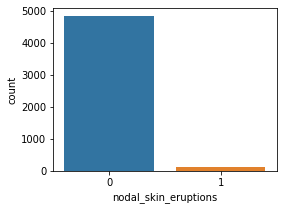

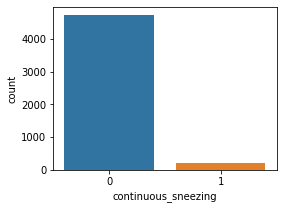

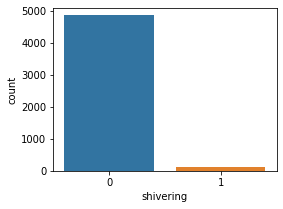

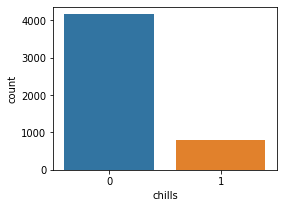

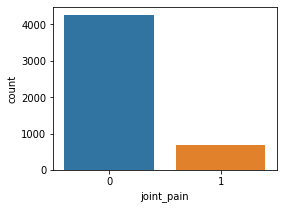

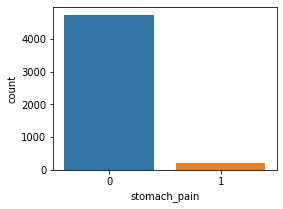

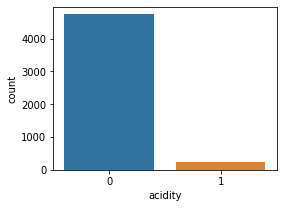

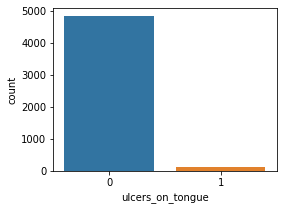

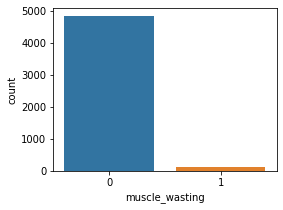

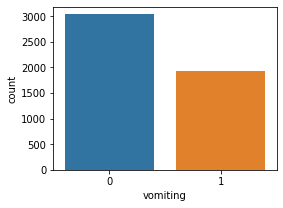

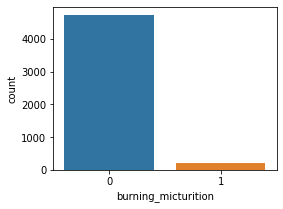

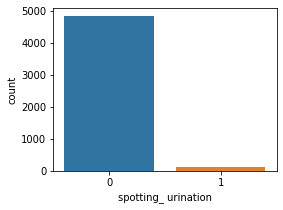

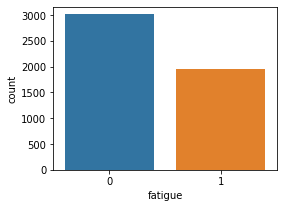

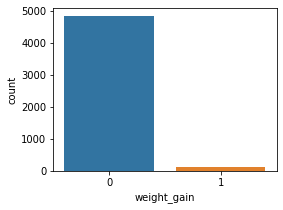

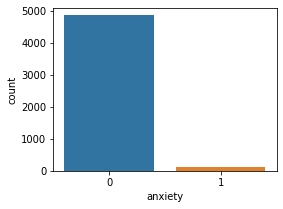

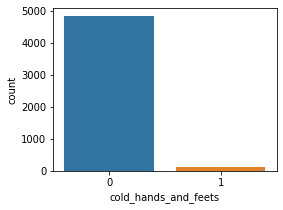

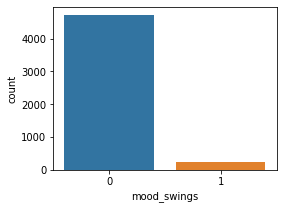

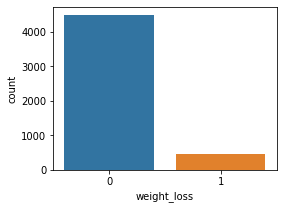

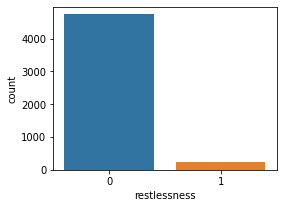

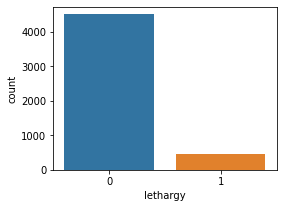

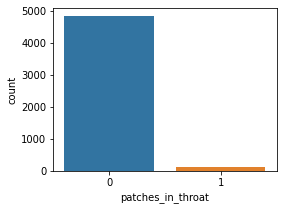

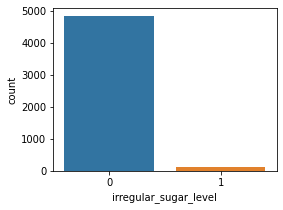

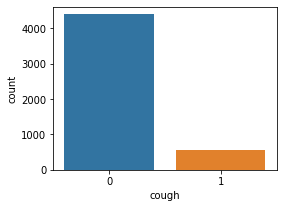

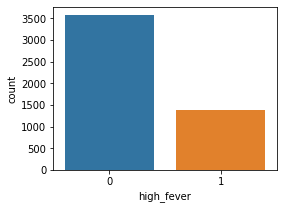

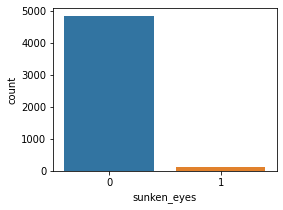

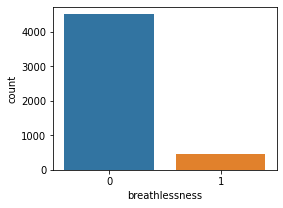

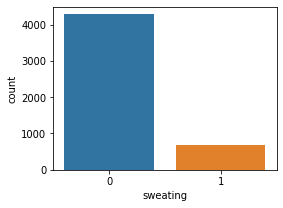

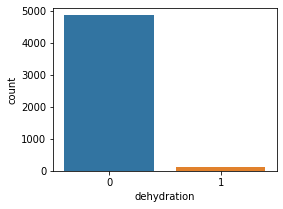

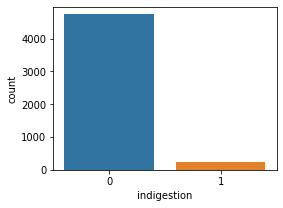

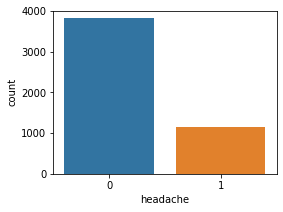

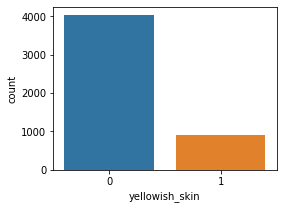

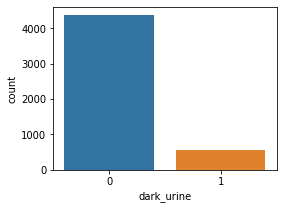

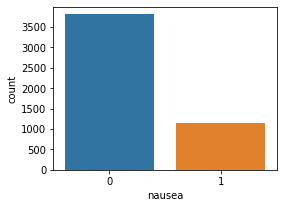

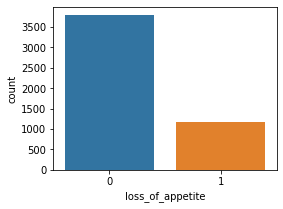

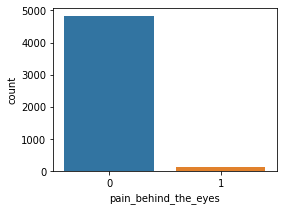

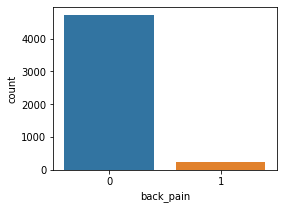

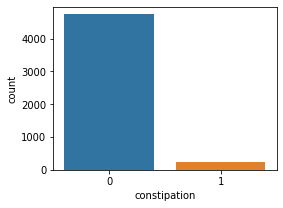

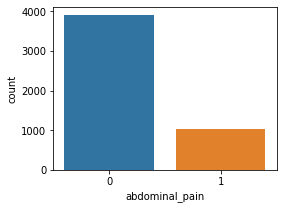

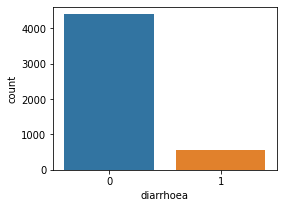

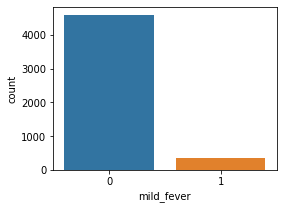

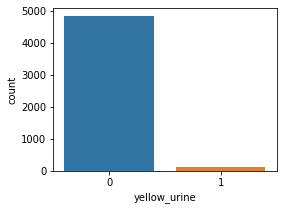

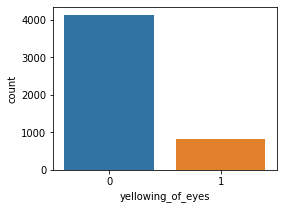

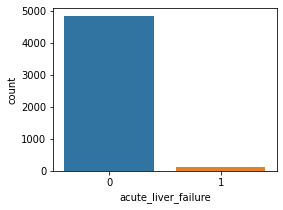

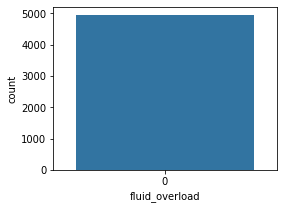

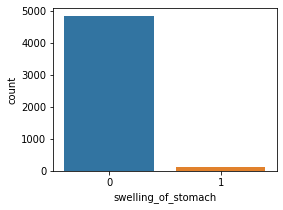

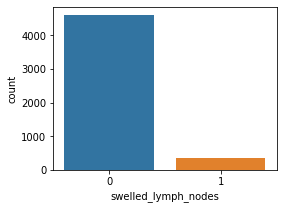

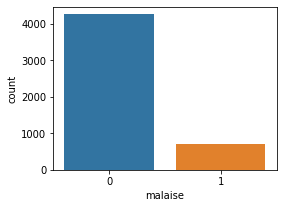

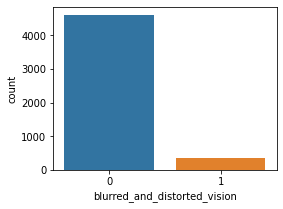

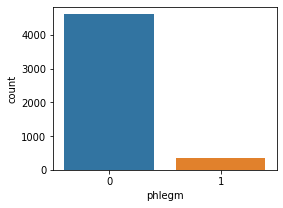

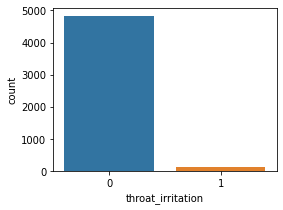

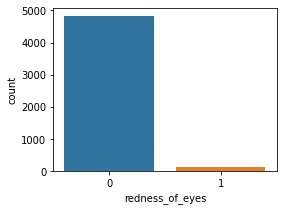

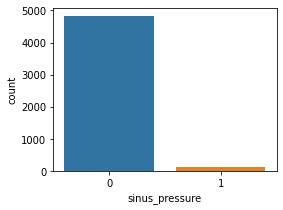

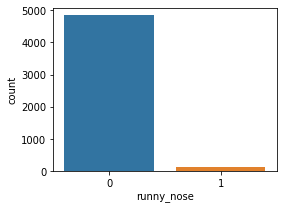

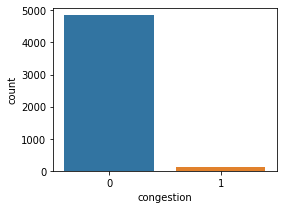

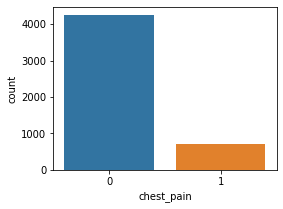

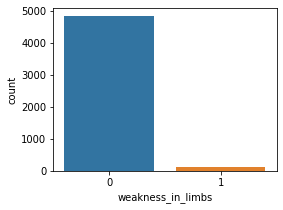

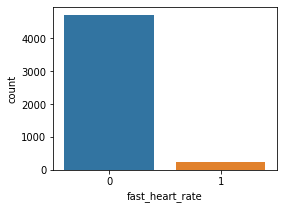

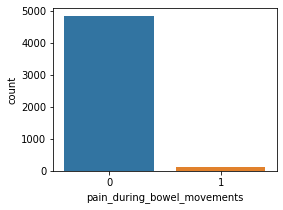

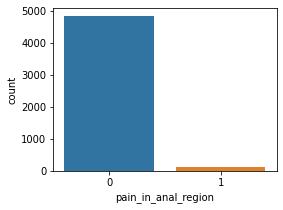

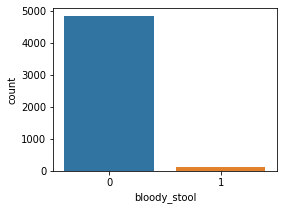

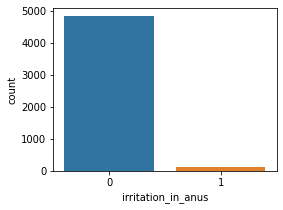

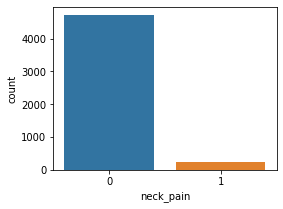

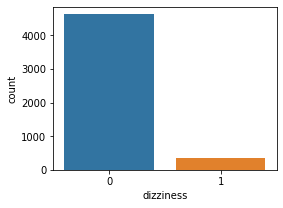

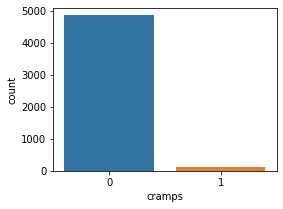

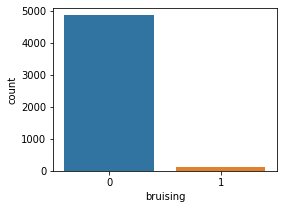

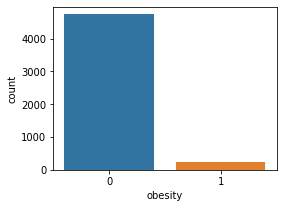

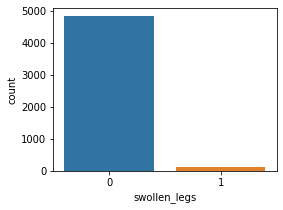

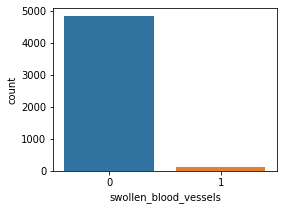

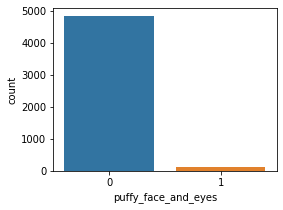

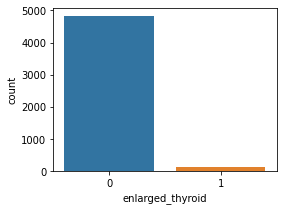

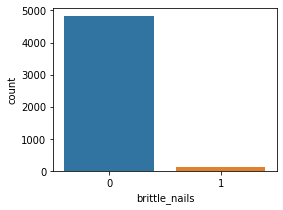

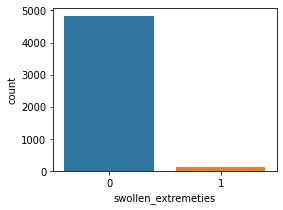

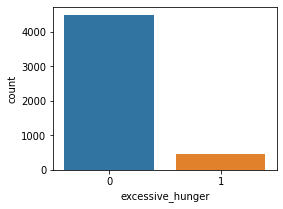

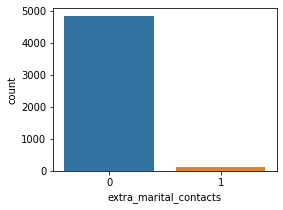

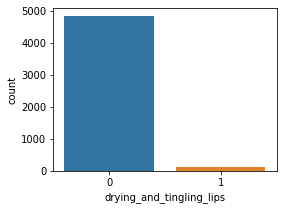

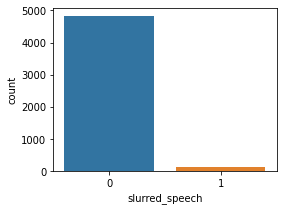

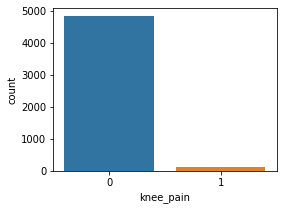

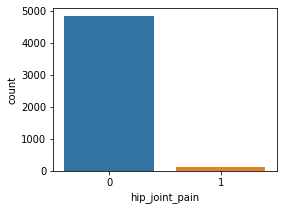

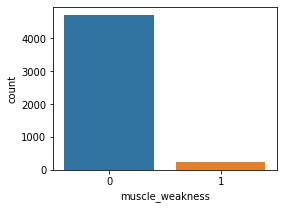

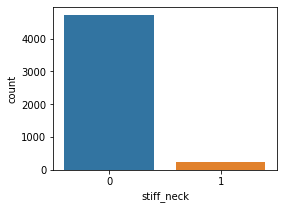

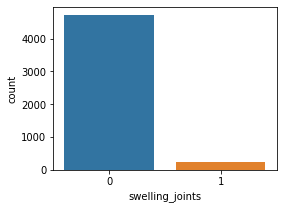

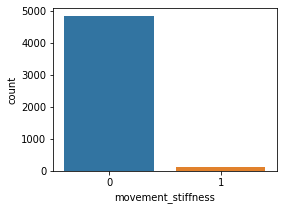

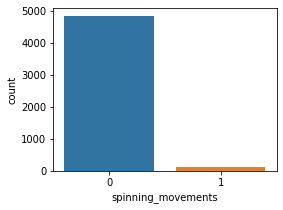

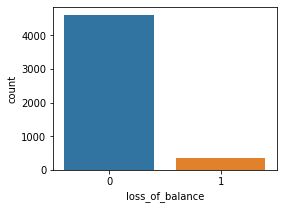

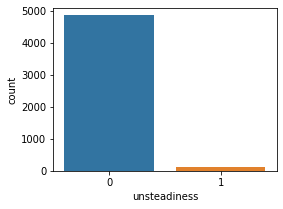

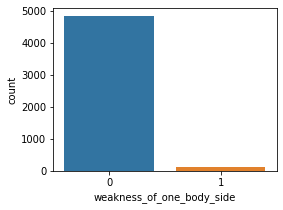

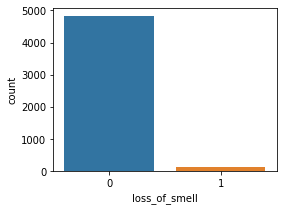

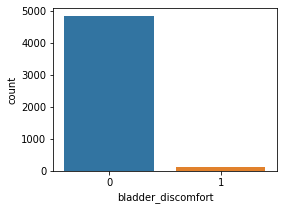

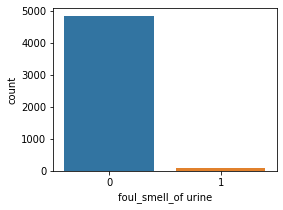

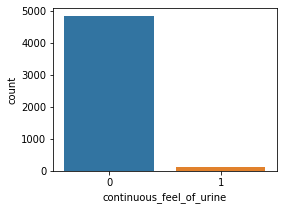

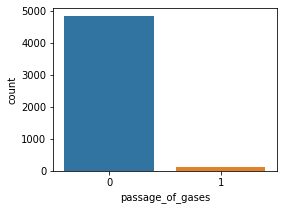

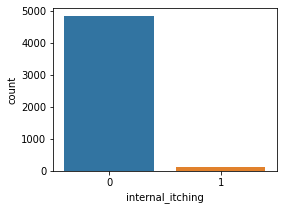

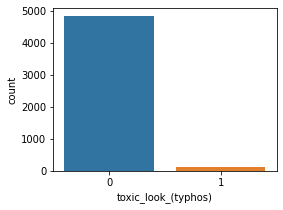

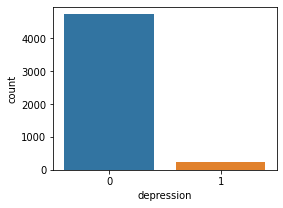

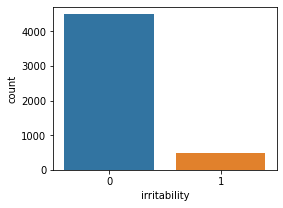

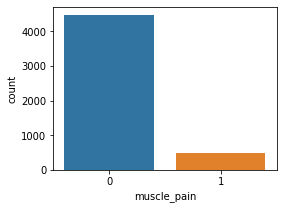

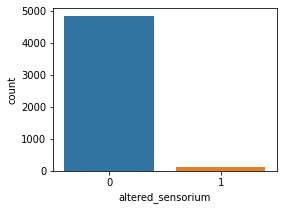

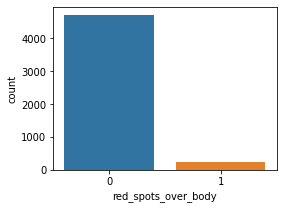

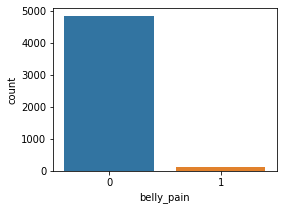

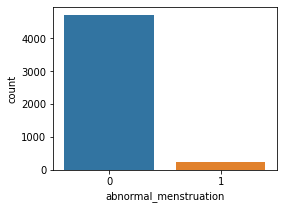

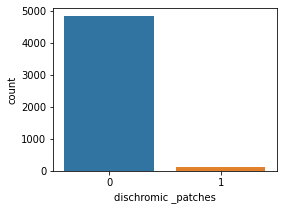

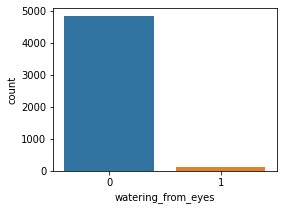

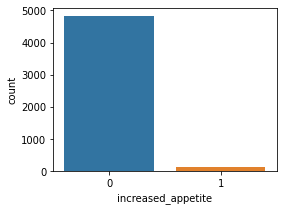

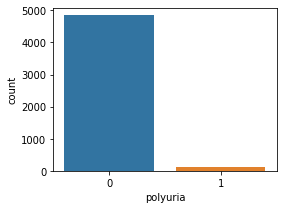

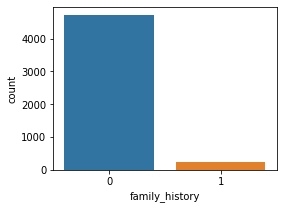

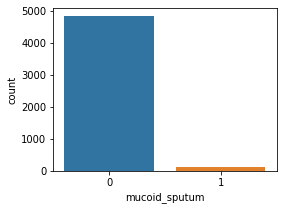

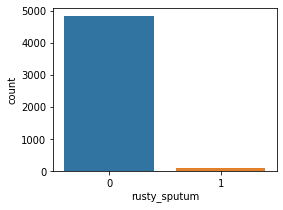

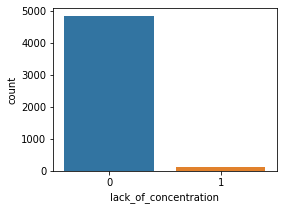

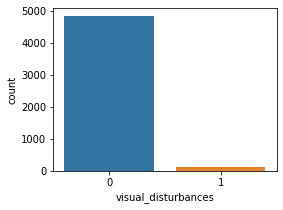

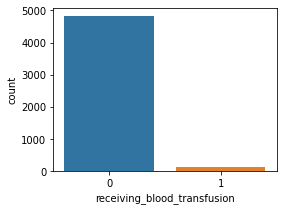

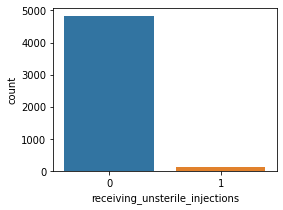

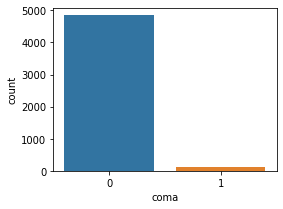

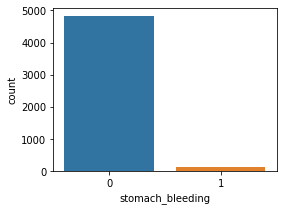

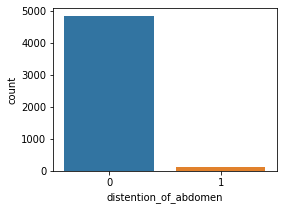

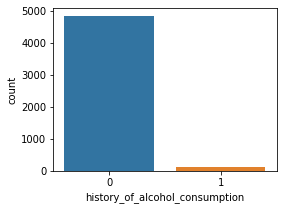

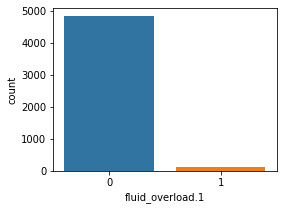

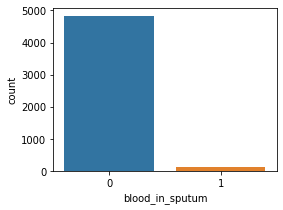

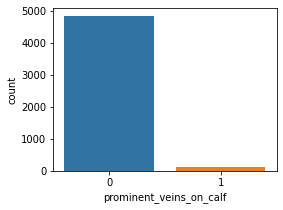

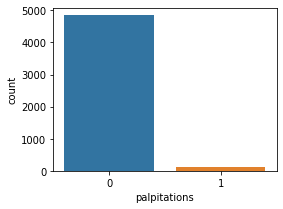

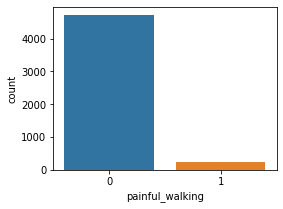

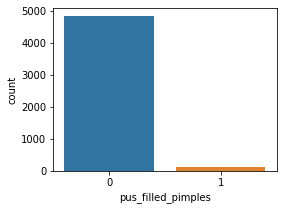

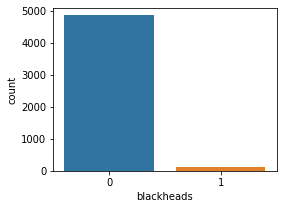

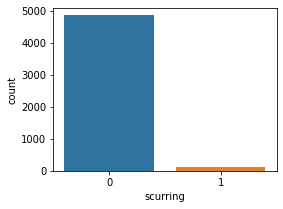

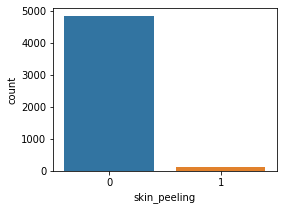

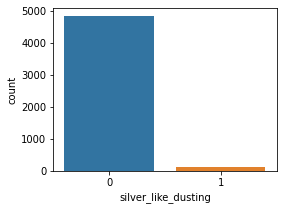

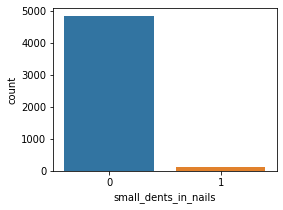

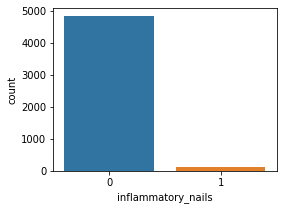

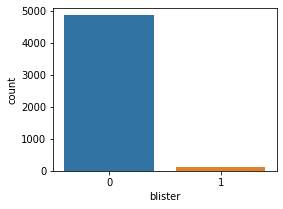

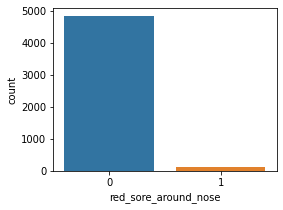

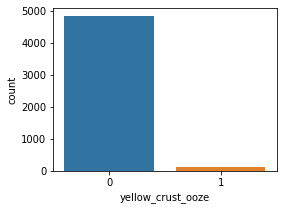

In [ ]:
for col in df.columns:
    if col =='prognosis':
        continue
    f = plt.figure()
    f.set_figwidth(4)
    f.set_figheight(3)    
    sns.countplot(data = df , x = col)
    plt.show()

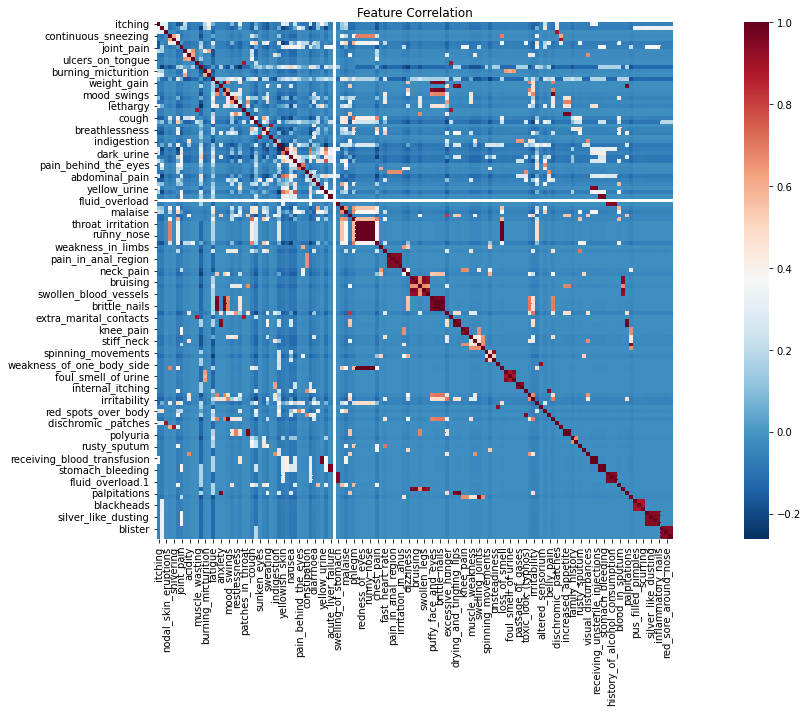

In [ ]:
X = df.drop('prognosis',axis =1)
corr = X.corr()
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(corr, square=True, annot=False, cmap="RdBu_r")
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()

LabelEncoder

In [ ]:
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,31


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('prognosis', 1), df['prognosis'], test_size = .4, random_state=42,shuffle=True)

<ipython-input-221-643151820bd0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train, X_test, y_train, y_test = train_test_split(df.drop('prognosis', 1), df['prognosis'], test_size = .4, random_state=42,shuffle=True)


In [ ]:
X_train.shape

(2977, 132)

## Classification models

In [ ]:
accuracy_scores=dict()

#### Logistic regression

In [ ]:
model=LogisticRegression(C=0.2,random_state=42, penalty='l2')
model.fit(X_train,y_train)
predTrain = model.predict(X_train)
predTest = model.predict(X_test)
print(accuracy_score(y_train, predTrain)*100, accuracy_score(y_test, predTest)*100)
accuracy_scores.update({'Log_reg':accuracy_score(y_test, predTest)*100})

100.0 100.0


In [ ]:
y_pred = model.predict(df.iloc[:,:-1])
cm = confusion_matrix(df['prognosis'], y_pred)
print(cm)

[[121   0   0 ...   0   0   0]
 [  0 121   0 ...   0   0   0]
 [  0   0 121 ...   0   0   0]
 ...
 [  0   0   0 ... 121   0   0]
 [  0   0   0 ...   0 121   0]
 [  0   0   0 ...   0   0 121]]


In [ ]:
print(classification_report( df['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       121
           2       1.00      1.00      1.00       121
           3       1.00      1.00      1.00       121
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00       121
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00       121
           9       1.00      1.00      1.00       121
          10       1.00      1.00      1.00       121
          11       1.00      1.00      1.00       121
          12       1.00      1.00      1.00       121
          13       1.00      1.00      1.00       121
          14       1.00      1.00      1.00       121
          15       1.00      1.00      1.00       122
          16       1.00      1.00      1.00       121
          17       1.00    

#### Decision Tree Classifier

In [ ]:
model=DTC()
model.fit(X_train,y_train)
predTrain = model.predict(X_train)
predTest = model.predict(X_test)
print(accuracy_score(y_train, predTrain)*100, accuracy_score(y_test, predTest)*100)
accuracy_scores.update({'DTC':accuracy_score(y_test, predTest)*100})

100.0 99.94962216624685


In [ ]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_114 <= 0.50
|   |--- feature_89 <= 0.50
|   |   |--- feature_79 <= 0.50
|   |   |   |--- feature_112 <= 0.50
|   |   |   |   |--- feature_115 <= 0.50
|   |   |   |   |   |--- feature_101 <= 0.50
|   |   |   |   |   |   |--- feature_95 <= 0.50
|   |   |   |   |   |   |   |--- feature_107 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_36 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_97 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_120 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 48
|   |   |   |   |   |   |   |   |   |   |--- feature_120 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 25
|   |   |   |   |   |   |   |   |   |--- feature_97 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_41 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_41 >  0.50
|   |   |   |   |   |   |   |   |   |   |  

In [ ]:
y_pred = model.predict(df.iloc[:,:-1])
cm = confusion_matrix(df['prognosis'], y_pred)
print(cm)

[[121   0   0 ...   0   0   0]
 [  0 121   0 ...   0   0   0]
 [  0   0 121 ...   0   0   0]
 ...
 [  0   0   0 ... 121   0   0]
 [  0   0   0 ...   0 121   0]
 [  0   0   0 ...   0   0 121]]


In [ ]:
print(classification_report( df['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       121
           2       1.00      1.00      1.00       121
           3       1.00      1.00      1.00       121
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00       121
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00       121
           9       1.00      1.00      1.00       121
          10       1.00      1.00      1.00       121
          11       1.00      1.00      1.00       121
          12       1.00      1.00      1.00       121
          13       1.00      1.00      1.00       121
          14       1.00      1.00      1.00       121
          15       1.00      0.99      1.00       122
          16       1.00      1.00      1.00       121
          17       1.00    

#### Random Forest Classifier

In [ ]:
model=RFC()
model.fit(X_train,y_train)
predTrain = model.predict(X_train)
predTest = model.predict(X_test)
print(accuracy_score(y_train, predTrain)*100, accuracy_score(y_test, predTest)*100)
accuracy_scores.update({'RFC':accuracy_score(y_test, predTest)*100})

100.0 99.94962216624685


In [ ]:
y_pred = model.predict(df.iloc[:,:-1])
cm = confusion_matrix(df['prognosis'], y_pred)
print(cm)

[[121   0   0 ...   0   0   0]
 [  0 121   0 ...   0   0   0]
 [  0   0 121 ...   0   0   0]
 ...
 [  0   0   0 ... 121   0   0]
 [  0   0   0 ...   0 121   0]
 [  0   0   0 ...   0   0 121]]


In [ ]:
print(classification_report( df['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       121
           2       1.00      1.00      1.00       121
           3       1.00      1.00      1.00       121
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       121
           6       1.00      1.00      1.00       121
           7       1.00      1.00      1.00       121
           8       1.00      1.00      1.00       121
           9       1.00      1.00      1.00       121
          10       1.00      1.00      1.00       121
          11       1.00      1.00      1.00       121
          12       1.00      1.00      1.00       121
          13       1.00      1.00      1.00       121
          14       1.00      1.00      1.00       121
          15       1.00      0.99      1.00       122
          16       1.00      1.00      1.00       121
          17       1.00    

#### SVC

In [ ]:
model=SVC()
model.fit(X_train,y_train)
predTrain = model.predict(X_train)
predTest = model.predict(X_test)
print(accuracy_score(y_train, predTrain)*100, accuracy_score(y_test, predTest)*100)
accuracy_scores.update({'SVC':accuracy_score(y_test, predTest)*100})

100.0 100.0


In [ ]:
y_pred = model.predict(df.iloc[:,:-1])
cm = confusion_matrix(df['prognosis'], y_pred)
print(cm)

[[121   0   0 ...   0   0   0]
 [  0 121   0 ...   0   0   0]
 [  0   0 121 ...   0   0   0]
 ...
 [  0   0   0 ... 121   0   0]
 [  0   0   0 ...   0 121   0]
 [  0   0   0 ...   0   0 121]]


#### Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(X_train,y_train)
predTrain = model.predict(X_train)
predTest = model.predict(X_test)
print(accuracy_score(y_train, predTrain)*100, accuracy_score(y_test, predTest)*100)
accuracy_scores.update({'Naive_Bayes':accuracy_score(y_test, predTest)*100})

100.0 100.0


In [ ]:
y_pred = model.predict(df.iloc[:,:-1])
cm = confusion_matrix(df['prognosis'], y_pred)
print(cm)

[[121   0   0 ...   0   0   0]
 [  0 121   0 ...   0   0   0]
 [  0   0 121 ...   0   0   0]
 ...
 [  0   0   0 ... 121   0   0]
 [  0   0   0 ...   0 121   0]
 [  0   0   0 ...   0   0 121]]


#### Neural Netwrok Classifier

In [ ]:
y_train_d = pd.get_dummies(y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(48, activation = "relu"))
model.add(Dense(y_train_d.shape[1], activation = "softmax"))
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.fit(X_train, y_train_d, epochs=100, batch_size=32)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 2.8809 - accuracy: 0.5301
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.9889
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 1.0000
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 1.0000
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 1.0000
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 11/

In [ ]:
for i, layer in enumerate(model.layers):
    print('Layer',i,':',layer.name)

Layer 0 : dense_10
Layer 1 : dense_11
Layer 2 : dense_12


In [ ]:
y_pred= model.predict(df.iloc[:,:-1])
y_pred = [np.argmax(i) for i in y_pred ]
print("Accuracy score:",(accuracy_score(df['prognosis'],y_pred)*100))
accuracy_scores.update({'NN':(accuracy_score(df['prognosis'],y_pred)*100)})

156/156 [==============================] - 0s 1ms/step
Accuracy score: 100.0


## Conclusion

In [ ]:
accuracy_scores

{'Log_reg': 100.0,
 'DTC': 99.94962216624685,
 'RFC': 99.94962216624685,
 'SVC': 100.0,
 'Naive_Bayes': 100.0,
 'NN': 100.0}

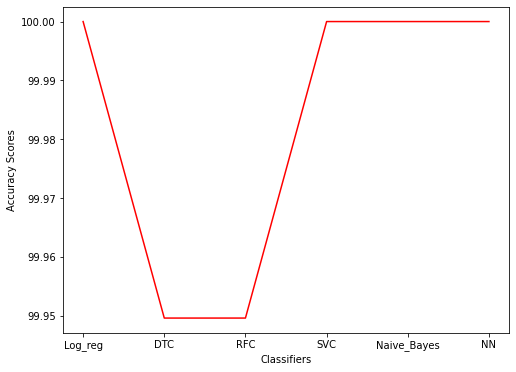

In [ ]:
x=list(accuracy_scores.keys())
y=list(accuracy_scores.values())
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)  
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Scores')
plt.plot(x, y,color='red')
plt.show()

All classifiers provided high accuracy in classifying the patients suffering from diseases based on their symptoms
